# <span style="color:Yellow">Imports & Settings</span>

## Import Libraries

In [20]:
import math
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Import Custom Libraries

## Self-defined Functions

In [2]:
# def get_descriptive_stats(df):
#   stats = {}
#   for col in df.columns:
#     stats[col] = {
#         "Mean": df[col].mean(skipna=True),
#         "Median": df[col].median(skipna=True),
#         "Range": df[col].max(skipna=True) - df[col].min(skipna=True),
#         "Std Dev": df[col].std(skipna=True),
#         "IQR": df[col].dropna().quantile(0.75) - df[col].dropna().quantile(0.25)  # IQR with dropna
#     }
#   return pd.DataFrame(stats)

def get_random_colour():
  # Generate random R, G, & B values between 0 and 1
  r, g, b = random.random(), random.random(), random.random()
  return (r, g, b)

## Pandas-Jupyter Settings

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# <span style="color:Yellow">Pre-processing</span>

## Import Data

In [4]:
df_raw = pd.read_csv('Group9 - missingdata.csv')

display(df_raw)

,Condition,Cylinder heating zone 1,Cylinder heating zone 4,Maximum injection pressure,Mould temperature control unit 1,Cycle time,Cylinder heating zone 5,Injection time,Cylinder heating zone 2,Dosage time,Cylinder heating zone 3,Switch-over volume,Material cushion
0,Normal1,274.92,322.46,1445.52,87.70,29.120,325.19,0.234,309.30,3.086,314.73,1.38334,0.888447
1,Normal1,266.69,302.12,1521.99,90.97,29.678,301.82,0.224,292.32,3.058,322.99,1.35334,0.899772
2,Normal1,287.07,299.90,1504.16,93.18,NaN,301.29,0.244,NaN,3.098,297.00,1.37334,0.889388
3,Normal1,279.81,295.40,1536.42,92.58,29.876,323.39,0.244,303.88,2.938,297.65,1.40334,0.926952
4,Normal1,293.69,322.20,1505.81,NaN,29.126,307.31,0.224,281.91,3.168,324.13,1.48334,0.919580
5,Normal1,NaN,303.28,1499.84,86.40,29.316,303.78,NaN,303.91,3.090,NaN,1.41334,0.932977
6,Normal1,284.60,307.72,1446.05,93.99,27.508,309.78,0.224,281.31,2.918,309.82,1.35334,NaN
7,Normal1,278.29,321.87,1579.28,93.41,28.478,313.54,0.244,304.19,2.850,300.17,1.38334,0.935242
8,Normal1,278.14,324.31,NaN,86.60,29.758,319.46,0.244,308.84,2.896,304.51,1.44334,0.892977
9,Normal1,285.16,324.40,1549.57,92.05,30.238,329.77,0.234,284.19,2.976,319.64,1.44334,0.884110


## Define Unique Sets

In [5]:
df_cond = np.sort(df_raw['Condition'].unique())

display(df_cond)

array(['Condition1', 'Condition7', 'Normal1'], dtype=object)

In [6]:
df_head = np.sort(df_raw.columns)

display(df_head)

array(['Condition', 'Cycle time', 'Cylinder heating zone 1',
       'Cylinder heating zone 2', 'Cylinder heating zone 3',
       'Cylinder heating zone 4', 'Cylinder heating zone 5',
       'Dosage time', 'Injection time', 'Material cushion',
       'Maximum injection pressure', 'Mould temperature control unit 1',
       'Switch-over volume'], dtype=object)

## Group Data

In [7]:
# df_gp = df_raw.groupby('Condition')

## Manage NaN Values

### <span style="color:Orange">Fill all NaN values by mean of condition.</span>

In [8]:
df = df_raw.copy()

# Fill all NaN values by mean of condition.
for col in df_head[1:]:
    df[col] = df[col].fillna(df.groupby('Condition')[col].transform('mean'))

display(df)

,Condition,Cylinder heating zone 1,Cylinder heating zone 4,Maximum injection pressure,Mould temperature control unit 1,Cycle time,Cylinder heating zone 5,Injection time,Cylinder heating zone 2,Dosage time,Cylinder heating zone 3,Switch-over volume,Material cushion
0,Normal1,274.920000,322.460000,1445.520000,87.700000,29.120000,325.190000,0.234000,309.300000,3.086000,314.730000,1.383340,0.888447
1,Normal1,266.690000,302.120000,1521.990000,90.970000,29.678000,301.820000,0.224000,292.320000,3.058000,322.990000,1.353340,0.899772
2,Normal1,287.070000,299.900000,1504.160000,93.180000,28.883083,301.290000,0.244000,293.361667,3.098000,297.000000,1.373340,0.889388
3,Normal1,279.810000,295.400000,1536.420000,92.580000,29.876000,323.390000,0.244000,303.880000,2.938000,297.650000,1.403340,0.926952
4,Normal1,293.690000,322.200000,1505.810000,90.194583,29.126000,307.310000,0.224000,281.910000,3.168000,324.130000,1.483340,0.919580
5,Normal1,279.992917,303.280000,1499.840000,86.400000,29.316000,303.780000,0.234213,303.910000,3.090000,310.488542,1.413340,0.932977
6,Normal1,284.600000,307.720000,1446.050000,93.990000,27.508000,309.780000,0.224000,281.310000,2.918000,309.820000,1.353340,0.947207
7,Normal1,278.290000,321.870000,1579.280000,93.410000,28.478000,313.540000,0.244000,304.190000,2.850000,300.170000,1.383340,0.935242
8,Normal1,278.140000,324.310000,1544.233333,86.600000,29.758000,319.460000,0.244000,308.840000,2.896000,304.510000,1.443340,0.892977
9,Normal1,285.160000,324.400000,1549.570000,92.050000,30.238000,329.770000,0.234000,284.190000,2.976000,319.640000,1.443340,0.884110


## Sort Data

In [9]:
df.sort_index(axis = 1, inplace = True)
df.sort_values(by = ['Condition', 'Material cushion'], inplace = True)

display(df)

,Condition,Cycle time,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Dosage time,Injection time,Material cushion,Maximum injection pressure,Mould temperature control unit 1,Switch-over volume
96,Condition1,27.812000,276.460000,307.330000,317.940000,314.040000,338.290000,2.899840,0.234000,0.868255,1497.640000,92.660000,1.343340
109,Condition1,28.544000,293.060000,318.290000,305.880000,332.190000,321.790000,2.916000,0.234000,0.868255,1466.930000,88.000000,1.463340
88,Condition1,30.170000,278.120000,296.060000,334.370000,334.690000,325.250000,2.880000,0.234000,0.870520,1501.200000,91.750000,1.343340
107,Condition1,29.972000,283.190000,306.620000,310.540000,315.110000,340.780000,2.808000,0.234800,0.870520,1491.430000,89.427600,1.403340
91,Condition1,27.592000,283.730000,313.050000,316.720000,335.000000,314.410000,2.816000,0.224000,0.885990,1540.740000,90.150000,1.433340
87,Condition1,28.822000,276.330000,300.840000,317.690000,312.940000,326.150000,3.000000,0.244000,0.886183,1421.750000,88.200000,1.343340
90,Condition1,29.600000,288.909200,294.770000,309.230000,320.880000,326.142917,2.814000,0.244000,0.888255,1460.550000,87.030000,1.443340
94,Condition1,27.980000,303.260000,306.510000,333.280000,317.620800,336.360000,2.980000,0.244000,0.896183,1553.930000,87.870000,1.417740
110,Condition1,29.684000,287.810000,303.450000,304.770000,310.100000,319.240000,2.800000,0.234000,0.898255,1515.950000,87.610000,1.403340
86,Condition1,28.942000,300.850000,306.100000,335.450000,312.560000,336.250000,2.954000,0.234000,0.902977,1567.630000,91.750000,1.473340


# <span style="color:Yellow">Summary & Stats</span>

In [10]:
df_des = {}

for condition in df_cond:
    df_des[condition] = df[df['Condition'] == condition].describe(include = 'all')
    display(df_des[condition])

,Condition,Cycle time,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Dosage time,Injection time,Material cushion,Maximum injection pressure,Mould temperature control unit 1,Switch-over volume
count,27,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Condition1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,30.548960,288.909200,306.760800,317.690000,317.620800,326.142917,2.899840,0.234800,0.914583,1486.969200,89.427600,1.417740
std,NaN,7.640885,8.819817,7.950681,9.596521,9.794029,8.757107,0.080885,0.007805,0.032465,45.173898,2.298885,0.044383
min,NaN,27.552000,275.620000,292.410000,304.460000,304.980000,312.120000,2.762000,0.224000,0.868255,1421.750000,85.570000,1.343340
25%,NaN,28.632000,281.700000,300.945000,310.195000,310.370000,319.130000,2.821000,0.229000,0.892219,1456.940000,87.885000,1.388340
50%,NaN,29.010000,288.909200,306.620000,316.720000,314.040000,326.142917,2.899840,0.234000,0.914583,1486.969200,89.427600,1.417740
75%,NaN,29.932000,296.945000,313.585000,325.160000,325.045000,334.815000,2.958000,0.244000,0.927689,1510.955000,91.085000,1.448340


,Condition,Cycle time,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Dosage time,Injection time,Material cushion,Maximum injection pressure,Mould temperature control unit 1,Switch-over volume
count,35,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Condition7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,29.392545,281.552727,295.424242,310.545455,309.118788,315.477941,2.846303,1.940000e-01,0.904566,1735.325000,89.979091,1.417162
std,NaN,0.626166,8.159180,7.866702,9.006702,8.614709,8.472093,0.080386,2.816079e-17,0.027072,43.997971,2.580665,0.038798
min,NaN,27.486000,266.700000,282.950000,295.160000,295.030000,300.380000,2.692000,1.940000e-01,0.856930,1666.610000,85.550000,1.335420
25%,NaN,29.144000,273.430000,289.520000,301.860000,301.780000,308.920000,2.786000,1.940000e-01,0.884292,1696.765000,87.620000,1.395420
50%,NaN,29.454000,283.490000,294.890000,311.400000,308.570000,315.060000,2.860000,1.940000e-01,0.908447,1735.325000,90.440000,1.415420
75%,NaN,29.815000,287.875000,300.855000,318.355000,315.560000,322.415000,2.898000,1.940000e-01,0.930328,1768.810000,91.740000,1.450985


,Condition,Cycle time,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Dosage time,Injection time,Material cushion,Maximum injection pressure,Mould temperature control unit 1,Switch-over volume
count,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Normal1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,28.883083,279.992917,293.361667,310.488542,309.567083,314.734468,2.955500,0.234213,0.947207,1544.233333,90.194583,1.407298
std,NaN,0.797309,7.107736,8.961685,8.627771,9.281702,9.171803,0.088607,0.008449,0.031388,46.701478,2.623928,0.044158
min,NaN,27.462000,266.330000,281.040000,295.040000,295.400000,299.710000,2.766000,0.224000,0.884110,1445.520000,85.910000,1.343340
25%,NaN,28.382500,274.975000,285.845000,304.487500,302.190000,307.815000,2.898500,0.224000,0.927411,1504.547500,87.677500,1.365840
50%,NaN,28.843542,279.700000,292.075000,310.609271,308.643542,314.734468,2.948000,0.234000,0.947207,1545.470000,90.430000,1.405319
75%,NaN,29.422000,284.532500,301.070000,317.172500,318.457500,322.852500,3.017500,0.244000,0.967802,1581.132500,92.595000,1.443340


# <span style="color:YELLOW">Understand Data</span>

## In total, how many records, how many parameters? <span style="color:green">DONE</span>

In [11]:
df_shape = pd.DataFrame({'Count':df_raw.shape}, index = ['Records', 'Parameters'])

display(df_shape)

,Count
Records,112
Parameters,13


## Is this a classification or regression issue?
### <span style="color:Orange">Classification issue.</span>

## How many different classes in the data?
### <span style="color:Orange">I have no clue.</span>

## How many records for each condition? <span style="color:green">DONE</span>

In [12]:
df_rec = df['Condition'].value_counts(dropna = False).to_frame()
display(df_rec)

,count
Condition,
Normal1,50
Condition7,35
Condition1,27


## How many null values for each condition under each parameter? <span style="color:green">DONE</span>

In [13]:
df_nc = pd.DataFrame(columns = df_cond)

for condition in df_cond:
    df_nc[condition] = df_raw[df_raw['Condition'] == condition].isnull().sum()

display(df_nc)

,Condition1,Condition7,Normal1
Condition,0,0,0
Cylinder heating zone 1,2,2,2
Cylinder heating zone 4,2,2,2
Maximum injection pressure,2,3,2
Mould temperature control unit 1,2,2,2
Cycle time,2,2,2
Cylinder heating zone 5,3,1,3
Injection time,2,2,3
Cylinder heating zone 2,2,2,2
Dosage time,2,2,2


# <span style="color:Yellow">Plot data</span>

## Cylinder heating zone

In [74]:
chz = df_head[np.array([col.startswith('Cylinder heating zone ') for col in df_head])]

display(chz)

array(['Cylinder heating zone 1', 'Cylinder heating zone 2',
       'Cylinder heating zone 3', 'Cylinder heating zone 4',
       'Cylinder heating zone 5'], dtype=object)

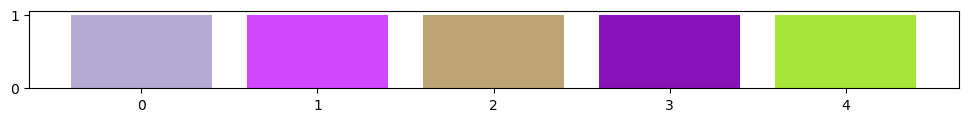

In [76]:
colours = [f'#{random.randint(0x7f7f7f, 0xffffff):06x}' for _ in range(len(chz))]

plt.figure(figsize = (12, 1))

for colour in colours:
    plt.bar(range(len(colours)),
            [1] * len(colours),
            label = colours,
            color = colours)

plt.show()

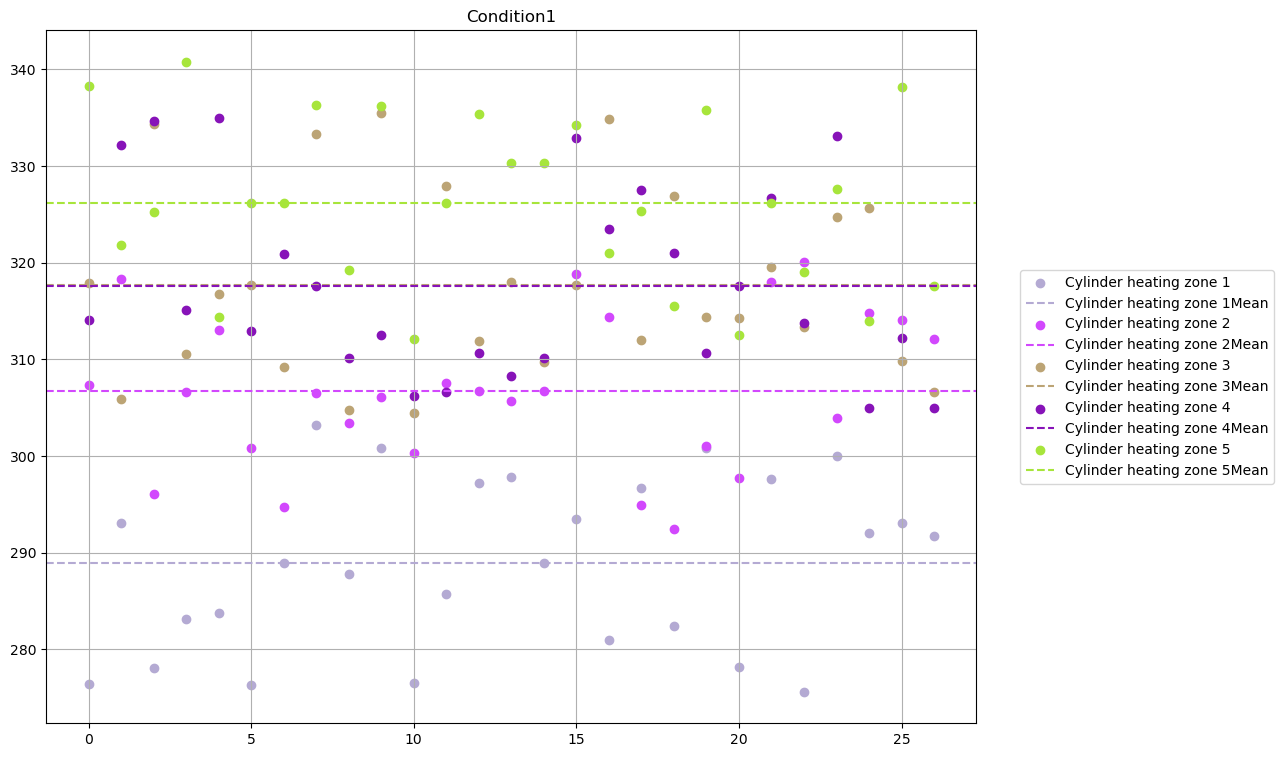

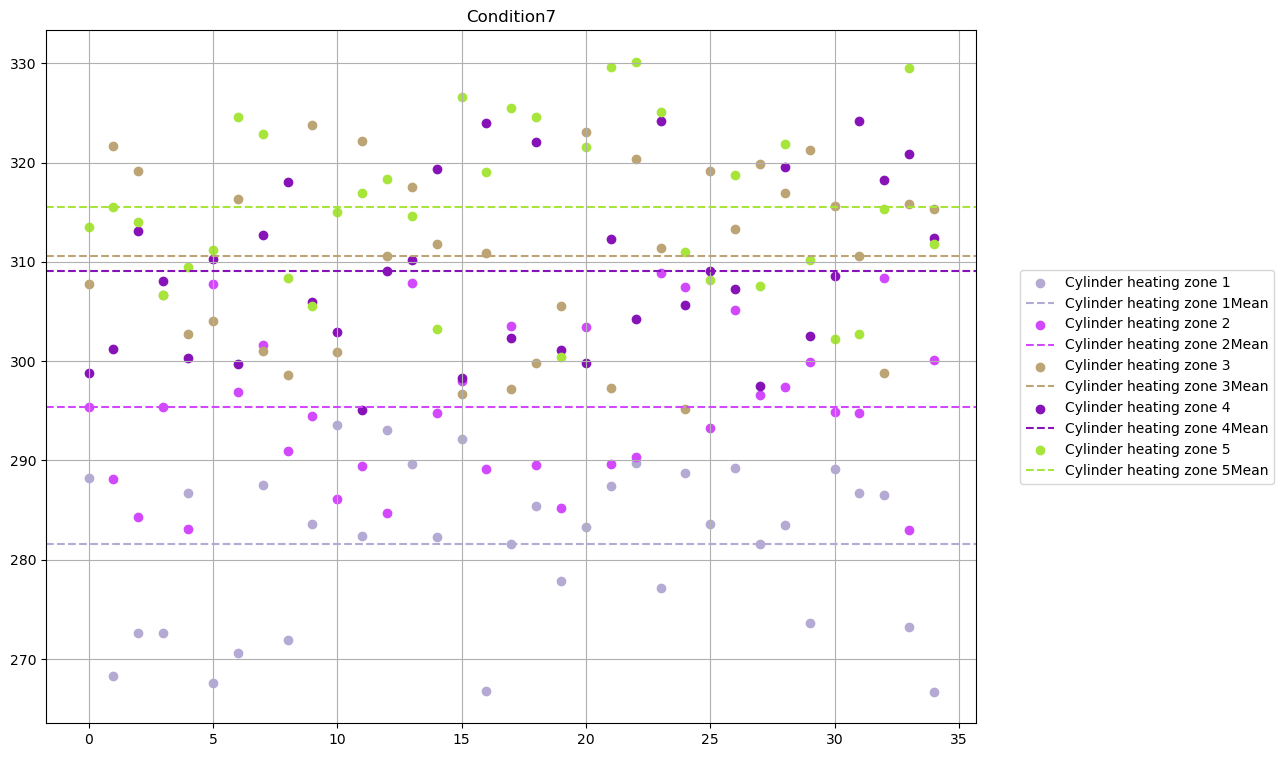

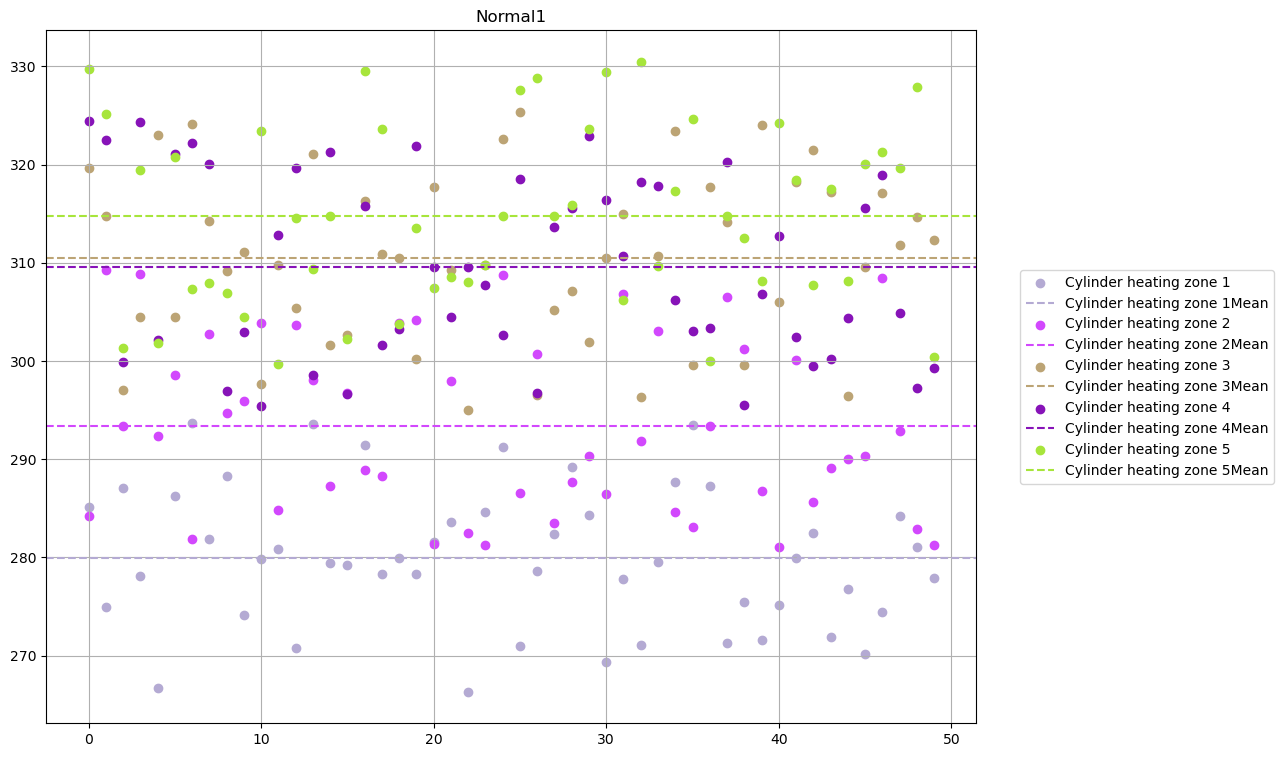

In [78]:
for condition in df_cond:
    plt.figure(figsize = (12, 9))
    for zone, colour in zip(chz, colours):
        plt.scatter(np.arange(df_des[condition]['Condition']['count']),
                    df[df['Condition'] == condition][zone],
                    label = zone,
                    color = colour)
        plt.axhline(y = df_des[condition][zone]['mean'],
                    linestyle = '--',
                    label = zone + 'Mean',
                    color = colour)
    
    plt.title(condition)
    plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
    plt.grid(True)
    plt.show()


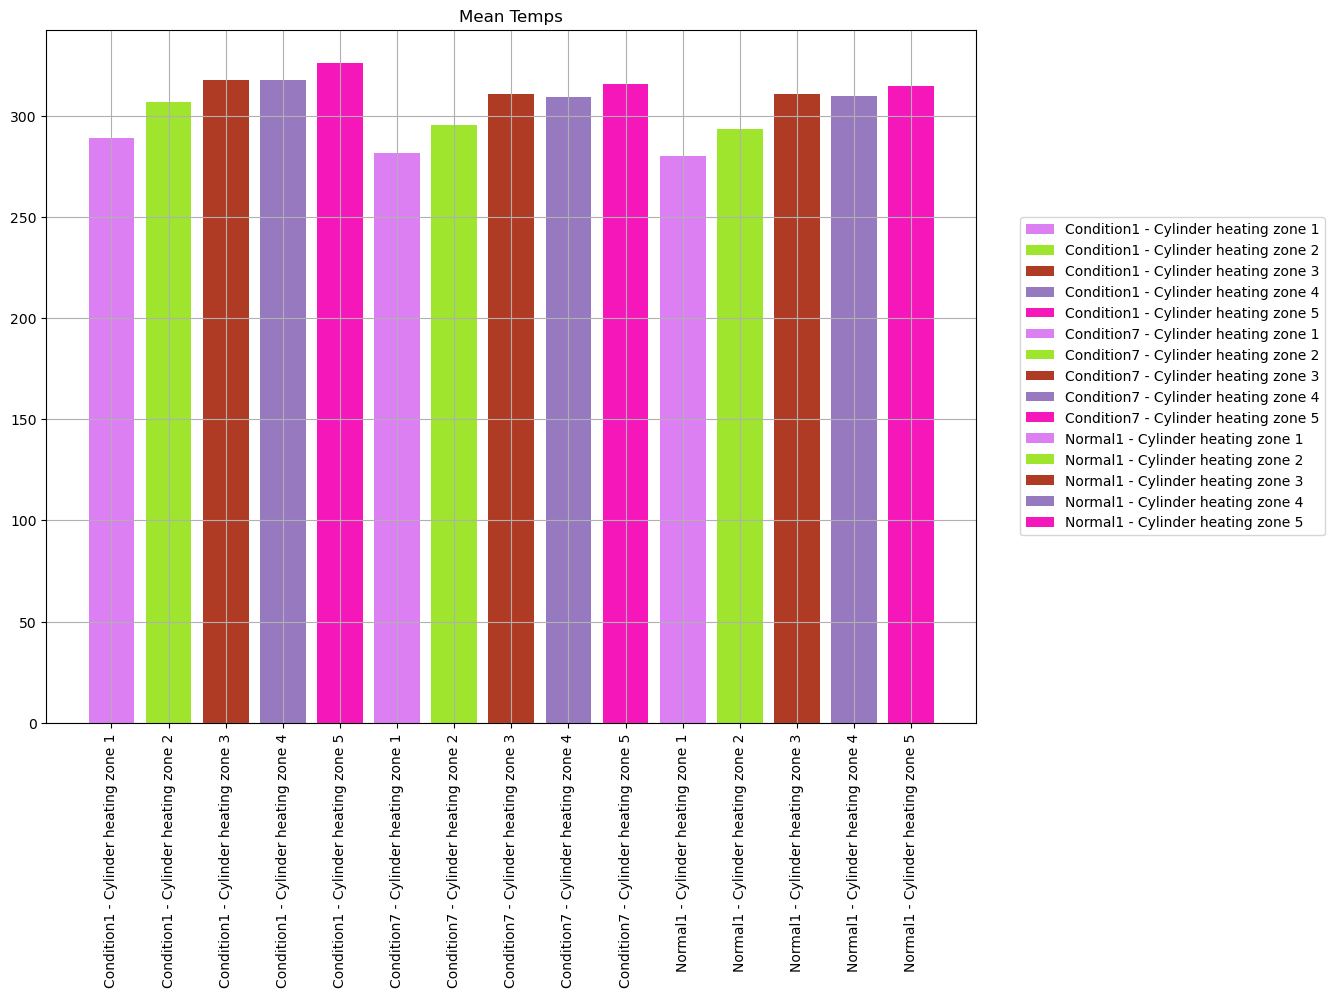

In [69]:
plt.figure(figsize = (12, 9))

for condition in df_cond:
    for zone, colour in zip(chz, colours):
        dfm = df_des[condition][zone]['mean']
        plt.bar(condition + ' - ' + zone, dfm, label = condition + ' - ' + zone, color = colour)

plt.xticks(rotation = 90)
plt.title('Mean Temps')
plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.grid(True)
plt.show()


## 